## 집 값 예측
- 예측할 변수 ['SalePrice']
- 평가: rmse, r2

    - rmse는 낮을 수록 좋은 성능
    - r2는 높을 수록 좋은 성능
   

In [32]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name

    if null_name != "":
        df[df == null_name] = np.nan

    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test

df = pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='SalePrice', id_name='Id')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168, 2), (292, 2))

In [2]:
# 평가: rmse, r2
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
81,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1418,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
1212,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
588,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,Inside,...,60,0,NaN,NaN,NaN,0,6,2009,WD,Partial
251,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,Inside,...,153,0,NaN,NaN,NaN,0,12,2007,WD,Family


In [4]:
# 예측할 변수 ['SalePrice']
y_train.head()

,Id,SalePrice
81,82,153500
1418,1419,124000
1212,1213,113000
588,589,143000
251,252,235000


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 81 to 1140
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    956 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          70 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuilt   

In [9]:
X_train.isnull().sum().sort_values(ascending=False)[:20]
# object값들이 null이 많음을 알수있음.

PoolQC          1163
MiscFeature     1124
Alley           1098
Fence            937
MasVnrType       703
FireplaceQu      553
LotFrontage      212
GarageCond        61
GarageType        61
GarageYrBlt       61
GarageQual        61
GarageFinish      61
BsmtExposure      30
BsmtFinType2      29
BsmtFinType1      29
BsmtCond          29
BsmtQual          29
MasVnrArea         6
Electrical         1
KitchenAbvGr       0
dtype: int64

In [11]:
X_test.isnull().sum().sort_values(ascending=False)[:20]
# object값들이 null이 많음을 알수있음.

PoolQC          290
MiscFeature     282
Alley           271
Fence           242
MasVnrType      169
FireplaceQu     137
LotFrontage      47
GarageCond       20
GarageType       20
GarageYrBlt      20
GarageQual       20
GarageFinish     20
BsmtFinType2      9
BsmtFinType1      8
BsmtExposure      8
BsmtCond          8
BsmtQual          8
MasVnrArea        2
KitchenAbvGr      0
KitchenQual       0
dtype: int64

In [6]:
X_train = X_train.select_dtypes(exclude=['object']) # object를 제외하고 데이터를 선택
X_test = X_test.select_dtypes(exclude=['object'])
target = y_train['SalePrice'] # 예측해야할 변수

In [13]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
81,120,32.0,4500,6,5,1998,1998,443.0,1201,0,...,405,0,199,0,0,0,0,0,3,2006
1418,20,71.0,9204,5,5,1963,1963,0.0,25,872,...,336,0,88,0,0,0,0,0,8,2008
1212,30,50.0,9340,4,6,1941,1950,0.0,344,0,...,234,0,113,0,0,0,0,0,8,2009
588,20,65.0,25095,5,8,1968,2003,0.0,1324,0,...,452,0,48,0,0,60,0,0,6,2009
251,120,44.0,4750,8,5,2006,2007,481.0,1573,0,...,538,123,0,0,0,153,0,0,12,2007


In [7]:
X_train.isnull().sum().sort_values(ascending=False)[:20]
# LotFrantage, GarageYrBlt는 Int 타입

LotFrontage      212
GarageYrBlt       61
MasVnrArea         6
WoodDeckSF         0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
MSSubClass         0
HalfBath           0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
OpenPorchSF        0
FullBath           0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
X_train = imp.fit_transform(X_train)
X_test = imp.fit_transform(X_test)
# SimpleImputer는 결측치에 대해 기본적으로 평균값을 채워준다.

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, target, test_size=0.15, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((992, 36), (176, 36), (992,), (176,))

In [31]:
y_train.head()

1078    155900
40      160000
347     157500
1040    155000
64      219500
Name: SalePrice, dtype: int64

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_val)

print("R2 : " + str(r2_score(y_val, pred)))
print("RMSE : " + str(np.sqrt(mean_squared_error(y_val, pred)))) # RMSE = mse에 제곱근을 취함

R2 : 0.8560469847092442
RMSE : 31546.78598736262


In [14]:
from xgboost import XGBRegressor

model_xg = XGBRegressor()
model_xg.fit(X_train, y_train)
pred_xg = model_xg.predict(X_val)

print("R2 : " + str(r2_score(y_val, pred_xg)))
print("RMSE : " + str(np.sqrt(mean_squared_error(y_val, pred_xg))))

R2 : 0.8794330757864643
RMSE : 28870.80060714076


In [22]:
pred

array([128142.58, 197827.  , 125236.66, 183849.75, 301873.15, 179939.9 ,
       152258.5 , 294396.46, 197149.55, 171104.56, 147197.  , 111782.9 ,
       362568.9 , 162663.06, 133403.83,  96437.93, 190487.05, 192773.  ,
       115583.  , 237995.62, 171979.05, 154034.7 , 146017.  , 241528.6 ,
       217791.75, 232735.48, 175226.64, 155681.95, 117441.84,  89239.83,
       263234.52, 178133.69, 233467.77, 225348.34, 125550.  , 137751.8 ,
       225970.33, 228701.04, 123597.24, 154236.27, 141874.02, 180027.85,
       156154.24, 246307.06, 196826.56,  80686.73, 137807.35, 118760.83,
       231506.75, 203059.  , 133059.47, 249719.02, 156924.5 ,  83380.43,
       198774.1 , 134358.07, 108089.29, 138490.7 , 120933.5 , 142923.2 ,
       234655.  , 127384.19, 176843.45, 152176.  , 143460.27, 151038.34,
       276055.44, 385192.7 , 148047.  , 100537.44, 167955.25, 156663.3 ,
       131020.28, 290028.94, 146473.5 , 133700.26, 275816.93, 171147.34,
       395919.02, 106662.78, 166431.74, 303810.9 , 

In [29]:
y_val.shape, pred_xg.shape

((176,), (176,))

In [28]:
pd.DataFrame({"id": y_val.index, "SalePrice": pred}).to_csv("submission.csv", index=False)

# Data Load & Simple EDA

In [ ]:
import pandas as pd

In [ ]:
X_train.shape, X_test.shape

((1168, 79), (292, 79))

In [ ]:
pd.set_option("display.max_columns", 100)
display(X_train.head(3))
display(X_test.head(3))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
81,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,443.0,TA,Gd,PConc,Ex,Gd,No,GLQ,1201,Unf,0,36,1237,GasA,Ex,Y,SBrkr,1337,0,0,1337,1,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1998.0,Fin,2,405,TA,TA,Y,0,199,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1418,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25,Rec,872,247,1144,GasA,TA,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1962.0,Unf,1,336,TA,TA,Y,0,88,0,0,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
1212,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,6,1941,1950,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,344,Unf,0,328,672,GasA,TA,Y,SBrkr,672,0,0,672,1,0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1941.0,Unf,1,234,TA,TA,N,0,113,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1380,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,Fa,BrkTil,TA,Fa,No,Rec,203,Unf,0,661,864,GasA,TA,N,FuseF,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1938.0,Unf,1,200,TA,Fa,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
520,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,7,1900,2000,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseA,694,600,0,1294,0,0,2,0,3,2,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,220,114,210,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
1175,50,RL,85.0,10678,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,5,1992,2000,Hip,CompShg,HdBoard,HdBoard,BrkFace,337.0,Gd,TA,PConc,Gd,TA,No,GLQ,700,Unf,0,983,1683,GasA,Ex,Y,SBrkr,2129,743,0,2872,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1992.0,Fin,2,541,TA,TA,Y,0,33,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


<AxesSubplot:>

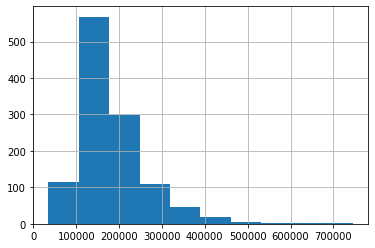

In [ ]:
y_train['SalePrice'].hist()

<AxesSubplot:>

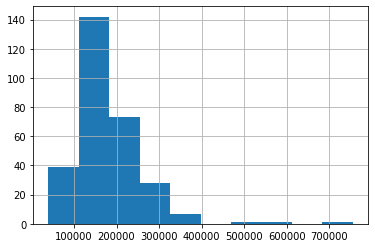

In [ ]:
y_test['SalePrice'].hist()

In [ ]:
X_train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1163
MiscFeature     1124
Alley           1098
Fence            937
FireplaceQu      553
LotFrontage      212
GarageType        61
GarageYrBlt       61
GarageQual        61
GarageCond        61
GarageFinish      61
BsmtExposure      30
BsmtCond          29
BsmtFinType2      29
BsmtFinType1      29
BsmtQual          29
MasVnrArea         6
MasVnrType         6
Electrical         1
BedroomAbvGr       0
dtype: int64

In [ ]:
X_test.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          290
MiscFeature     282
Alley           271
Fence           242
FireplaceQu     137
LotFrontage      47
GarageType       20
GarageYrBlt      20
GarageQual       20
GarageCond       20
GarageFinish     20
BsmtFinType2      9
BsmtCond          8
BsmtFinType1      8
BsmtQual          8
BsmtExposure      8
MasVnrArea        2
MasVnrType        2
BedroomAbvGr      0
BsmtFullBath      0
dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 81 to 1140
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    956 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          70 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBui

# Preprocessing

In [33]:
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])
target = y_train['SalePrice']

In [ ]:
X_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
81,120,32.0,4500,6,5,1998,1998,443.0,1201,0,36,1237,1337,0,0,1337,1,0,2,0,2,1,5,0,1998.0,2,405,0,199,0,0,0,0,0,3,2006
1418,20,71.0,9204,5,5,1963,1963,0.0,25,872,247,1144,1144,0,0,1144,1,0,1,1,3,1,6,0,1962.0,1,336,0,88,0,0,0,0,0,8,2008
1212,30,50.0,9340,4,6,1941,1950,0.0,344,0,328,672,672,0,0,672,1,0,1,0,2,1,4,0,1941.0,1,234,0,113,0,0,0,0,0,8,2009


In [34]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [ ]:
X_train

array([[1.20000000e+02, 3.20000000e+01, 4.50000000e+03, ...,
        0.00000000e+00, 3.00000000e+00, 2.00600000e+03],
       [2.00000000e+01, 7.10000000e+01, 9.20400000e+03, ...,
        0.00000000e+00, 8.00000000e+00, 2.00800000e+03],
       [3.00000000e+01, 5.00000000e+01, 9.34000000e+03, ...,
        0.00000000e+00, 8.00000000e+00, 2.00900000e+03],
       ...,
       [6.00000000e+01, 8.90000000e+01, 1.16450000e+04, ...,
        0.00000000e+00, 8.00000000e+00, 2.00600000e+03],
       [6.00000000e+01, 7.00700837e+01, 7.50000000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 2.01000000e+03],
       [2.00000000e+01, 6.00000000e+01, 7.35000000e+03, ...,
        0.00000000e+00, 6.00000000e+00, 2.00800000e+03]])

In [35]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.15, random_state=2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((992, 36), (176, 36), (992,), (176,))

# Model

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [38]:
model = XGBRegressor()
model.fit(X_tr, y_tr, verbose=False)
pred = model.predict(X_val)

print("R2 : " + str(r2_score(y_val, pred)))
print("RMSE : " + str(rmse(y_val, pred)))

R2 : 0.8794330757864643
RMSE : 28870.80060714076


In [39]:
y_val.shape, pred.shape

((176,), (176,))

In [40]:
model = RandomForestRegressor()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)

print("R2 : " + str(r2_score(y_val, pred)))
print("RMSE : " + str(rmse(y_val, pred)))

R2 : 0.8504062058319808
RMSE : 32158.925171155202


In [41]:
y_val.shape, pred.shape

((176,), (176,))

In [46]:
y_train.head()

,Id,SalePrice
81,82,153500
1418,1419,124000
1212,1213,113000
588,589,143000
251,252,235000


In [49]:
X_test.shape

(292, 36)

In [42]:
y = y_train['SalePrice']

In [43]:
final_model = XGBRegressor()
final_model.fit(X_train, y)

prediction = final_model.predict(X_test)

In [45]:
prediction.shape, y_test.shape

((292,), (292, 2))

## Prediction & to CSV

In [ ]:
submission = pd.DataFrame(data={
    'Id': y_test.Id,
    'income' : prediction
})

In [ ]:
submission.head()

,Id,income
1380,1381,79665.031250
520,521,112973.062500
1175,1176,327729.593750
351,352,184498.734375
1335,1336,155756.921875


In [ ]:
submission.to_csv("12345.csv", index=False)

# 결과 체점

In [ ]:
pred = model.predict(X_test)
print("RMSE : " + str(rmse(y_test['SalePrice'], prediction)))
print("R2 : " + str(r2_score(y_test['SalePrice'], prediction)))

RMSE : 25308.81766179412
R2 : 0.8902345949704513
